In [1]:
import os.path as op

import mne
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from utils import Preprocessing

In [3]:
import importlib
importlib.reload(Preprocessing)

<module 'utils.Preprocessing' from '/home/jasongong/OneDrive/projects/eeg/EEG_pilot_1/utils/Preprocessing.py'>

In [4]:
subjs = ["%03d" % x for x in range(0,182)]

In [5]:
sessions = ["%03d" % x for x in range(1,4)]

In [6]:
def make_file_path(prefix, subj, session):
    return prefix + "sub-P"+subj+"/ses-S"+session+"/eeg/sub-P"+subj+"_ses-S"+session+"_task-Default_run-001_eeg.xdf"

In [7]:
prefix = "/media/jasongong/Data/eeg/muse/CurrentStudy_backed_up_box_for_p150_120122/"

In [8]:
from IPython.display import clear_output

In [9]:
import os

In [11]:
preprocess_dict = {}
for subj in subjs:
    subj_df_dict = {}
    for session in sessions:
        file = make_file_path(prefix, subj, session)
        if os.path.isfile(file):
            try:
                print("processing subj: {} session: {}".format(subj, session))
                streams, header  = Preprocessing.load_xdf(file, select_streams=[{'type': 'EEG'}],
                                    synchronize_clocks=False,
                                     sync_timestamps=True,
                                     dejitter_timestamps=False)
                if streams[0]['info']['name'][0][5:9] == 'AC76':
                    director = streams[0]
                    matcher = streams[1]
                elif streams[0]['info']['name'][0][5:9] == 'AC7D':
                    director = streams[1]
                    matcher = streams[0]
                else:
                    raise Exception("stream naming incorrect")
                    
                timeseries_p1 = Preprocessing.preprocessing_autoreject(director)
                timeseries_p2 = Preprocessing.preprocessing_autoreject(matcher)
                pair_df = pd.concat([timeseries_p1, timeseries_p2.iloc[:,3:]], axis=1)
                pair_df.columns = ["index", "epoch", "time", "TP9-1", "AF7-1", "AF8-1", "TP10-1", "TP9-2", "AF7-2", "AF8-2", "TP10-2"]
                clear_output()

                subj_df_dict[session] = pair_df
            except:
                print("Failed subj: {} session: {}".format(subj, session))
            
    if os.path.exists(prefix+"sub-P"+subj):
        preprocess_dict[subj] = subj_df_dict

processing subj: 175 session: 003


sync_timestamps defaults to "linear"


Creating RawArray with float64 data, n_channels=4, n_times=105856
    Range : 0 ... 105855 =      0.000 ...   413.496 secs
Ready.
Not setting metadata
413 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 413 events and 256 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['TP9', 'AF8', 'TP10']
    Rejecting  epoch based on EEG : ['TP9', 'AF8', 'TP10']
    Rejecting  epoch based on EEG : ['TP9']
    Rejecting  epoch based on EEG : ['TP9', 'TP10']
    Rejecting  epoch based on EEG : ['TP9', 'TP10']
    Rejecting  epoch based on EEG : ['TP9']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7', 'AF8']
    Rejecting  epoch based on EEG : ['TP9']
    Rejecting  epoch based on EEG : ['AF7']

  0%|          | Creating augmented epochs : 0/4 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/4 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=0


  0%|          | Repairing epochs : 0/81 [00:00<?,       ?it/s]

Dropped 23 epochs: 2, 5, 7, 8, 9, 10, 12, 16, 17, 21, 26, 32, 34, 40, 41, 49, 51, 52, 55, 64, 65, 68, 75
Creating RawArray with float64 data, n_channels=4, n_times=105856
    Range : 0 ... 105855 =      0.000 ...   413.496 secs
Ready.
Not setting metadata
413 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 413 events and 256 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
Failed subj: 175 session: 003
processing subj: 177 session: 001
Failed subj: 177 session: 001
processing subj: 177 session: 002
Failed subj: 177 session: 002
processing subj: 177 session: 003
Failed subj: 177 session: 003


# dump data as pickle files

In [11]:
import pickle

In [22]:
filehandler = open("preprocessed_data.obj","wb")
pickle.dump(preprocess_dict,filehandler)
filehandler.close()

In [9]:
file = open("preprocessed_data.obj",'rb')
preprocess_dict = pickle.load(file)
file.close()

# Save data as a long dataframe

In [12]:
eeg_long_df_list = []
subj_list = []
ses_list = []
for subj in list(preprocess_dict.keys()):
    for ses in list(preprocess_dict[subj].keys()):
        temp_df = preprocess_dict[subj][ses]
        eeg_long_df_list.append(temp_df)
        subj_list.append([subj] * temp_df.shape[0])
        ses_list.append([ses] * temp_df.shape[0])

In [13]:
subj_list = [item for sublist in subj_list for item in sublist]
ses_list = [item for sublist in ses_list for item in sublist]

In [14]:
eeg_long_df = pd.concat(eeg_long_df_list).reset_index()

In [15]:
eeg_long_df["subj"] = subj_list
eeg_long_df["ses"] = ses_list

In [17]:
eeg_long_df

,level_0,index,epoch,time,TP9-1,AF7-1,AF8-1,TP10-1,TP9-2,AF7-2,AF8-2,TP10-2,subj,ses
0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.523337,3.987578,9.493740,0.499491,001,002
1,1,1,0,4,0.000000,0.000000,0.000000,0.000000,11.582588,87.751758,103.981922,6.038757,001,002
2,2,2,0,8,0.000000,0.000000,0.000000,0.000000,21.770822,156.465099,184.323352,11.268438,001,002
3,3,3,0,12,0.000000,0.000000,0.000000,0.000000,30.354055,198.812422,239.460790,15.880544,001,002
4,4,4,0,16,0.000000,0.000000,0.000000,0.000000,36.829288,209.820592,263.668332,19.580846,001,002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26830587,90875,51963,354,980,63.436088,57.079530,48.344287,46.407258,0.000000,0.000000,0.000000,0.000000,175,002
26830588,90876,51964,354,984,59.205256,55.385689,36.192805,22.703361,0.000000,0.000000,0.000000,0.000000,175,002
26830589,90877,51965,354,988,54.826798,54.685868,24.947982,-1.209968,0.000000,0.000000,0.000000,0.000000,175,002
26830590,90878,51966,354,992,50.480458,55.315183,15.482242,-24.126746,0.000000,0.000000,0.000000,0.000000,175,002


In [18]:
eeg_long_df.to_csv("big_preprocessed_eeg_df.csv")

In [18]:
# eeg_long_df = pd.read_csv("big_preprocessed_eeg_df.csv")

In [26]:
import numpy as np

In [27]:
eeg_long_df[["TP9-1", "AF7-1", "AF8-1", "TP10-1", "TP9-2", "AF7-2", "AF8-2", "TP10-2"]] = \
eeg_long_df.loc[:, ["TP9-1", "AF7-1", "AF8-1", "TP10-1", "TP9-2", "AF7-2", "AF8-2", "TP10-2"]].replace(0, np.nan)

In [28]:
eeg_long_df

,level_0,index,epoch,time,TP9-1,AF7-1,AF8-1,TP10-1,TP9-2,AF7-2,AF8-2,TP10-2,subj,ses
0,0,0,0,0,NaN,NaN,NaN,NaN,-0.225456,-0.914575,-0.596503,0.532545,059,003
1,1,1,0,4,NaN,NaN,NaN,NaN,0.480530,0.621275,0.556312,0.325717,059,003
2,2,2,0,8,NaN,NaN,NaN,NaN,1.186339,1.974949,1.610955,0.318902,059,003
3,3,3,0,12,NaN,NaN,NaN,NaN,1.883819,2.942812,2.454019,0.718974,059,003
4,4,4,0,16,NaN,NaN,NaN,NaN,2.551928,3.302713,2.956178,1.726097,059,003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21128955,90875,51963,354,980,63.436088,57.079530,48.344287,46.407258,NaN,NaN,NaN,NaN,175,002
21128956,90876,51964,354,984,59.205256,55.385689,36.192805,22.703361,NaN,NaN,NaN,NaN,175,002
21128957,90877,51965,354,988,54.826798,54.685868,24.947982,-1.209968,NaN,NaN,NaN,NaN,175,002
21128958,90878,51966,354,992,50.480458,55.315183,15.482242,-24.126746,NaN,NaN,NaN,NaN,175,002


# Measure EEG inter-subject correlation

In [29]:
corr_df_TP9 = eeg_long_df.groupby(["subj", "ses"])[["TP9-1", "TP9-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]
corr_df_AF7 = eeg_long_df.groupby(["subj", "ses"])[["AF7-1", "AF7-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]
corr_df_AF8 = eeg_long_df.groupby(["subj", "ses"])[["AF8-1", "AF8-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]
corr_df_TP10 = eeg_long_df.groupby(["subj", "ses"])[["TP10-1", "TP10-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]

corr_df = pd.concat([corr_df_TP9, corr_df_AF7, corr_df_AF8, corr_df_TP10], axis=1)
corr_df.columns = ["TP9", "AF7", "AF8", "TP10"]
corr_df["subj"] = eeg_long_df.groupby(["subj", "ses"])[["TP9-1", "TP9-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,0]
corr_df["ses"] = eeg_long_df.groupby(["subj", "ses"])[["TP9-1", "TP9-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,1]

In [30]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses
0,0.045510,-0.024599,0.012211,0.030654,059,003
1,0.060650,-0.051558,-0.034861,0.038447,060,001
2,-0.010182,0.093458,-0.161952,-0.012660,060,002
3,0.016426,0.036092,-0.000918,-0.066099,060,003
4,-0.037079,-0.258230,0.328920,-0.218062,062,001
...,...,...,...,...,...,...
181,0.080516,-0.053196,-0.097793,0.073627,172,002
182,-0.432046,0.399743,-0.144200,-0.186687,174,001
183,0.031208,0.015347,0.019999,-0.014736,174,002
184,-0.009230,-0.006618,-0.020977,-0.021123,174,003


# Load task performance

In [10]:
task_performance_df = pd.read_csv("task_performance.csv")

task_performance_df

In [67]:
task_performance_df["subj"] = np.repeat(task_performance_df.Subject.dropna().astype(int).tolist(), 3)
task_performance_df["ses"] = np.tile(np.arange(1,4), task_performance_df.subj.unique().shape[0])

In [68]:
task_performance_df = task_performance_df[["Performance", "Time (sec)", "Signal Drop", "subj", "ses"]]
task_performance_df = task_performance_df.dropna()

In [69]:
task_performance_df
task_performance_df.to_csv("task_performance_new.csv")

In [35]:
from scipy.stats import pearsonr

In [37]:
corr_df["subj"] = corr_df["subj"].astype(int)
corr_df["ses"] = corr_df["ses"].astype(int)

In [38]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses
0,0.045510,-0.024599,0.012211,0.030654,59,3
1,0.060650,-0.051558,-0.034861,0.038447,60,1
2,-0.010182,0.093458,-0.161952,-0.012660,60,2
3,0.016426,0.036092,-0.000918,-0.066099,60,3
4,-0.037079,-0.258230,0.328920,-0.218062,62,1
...,...,...,...,...,...,...
181,0.080516,-0.053196,-0.097793,0.073627,172,2
182,-0.432046,0.399743,-0.144200,-0.186687,174,1
183,0.031208,0.015347,0.019999,-0.014736,174,2
184,-0.009230,-0.006618,-0.020977,-0.021123,174,3


In [39]:
corr_df = corr_df.merge(task_performance_df, on=["subj", "ses"], how="left")

In [40]:
corr_df = corr_df.dropna()

In [41]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses,Performance,Time (sec),Signal Drop
1,0.060650,-0.051558,-0.034861,0.038447,60,1,3.0,454.0,1.0
2,-0.010182,0.093458,-0.161952,-0.012660,60,2,3.0,494.0,1.0
3,0.016426,0.036092,-0.000918,-0.066099,60,3,4.0,400.0,0.0
4,-0.037079,-0.258230,0.328920,-0.218062,62,1,8.0,329.0,1.0
5,-0.043783,-0.023168,-0.001434,-0.044677,62,3,9.0,353.0,0.0
...,...,...,...,...,...,...,...,...,...
181,0.080516,-0.053196,-0.097793,0.073627,172,2,7.0,180.0,0.0
182,-0.432046,0.399743,-0.144200,-0.186687,174,1,9.0,407.0,1.0
183,0.031208,0.015347,0.019999,-0.014736,174,2,7.0,322.0,0.0
184,-0.009230,-0.006618,-0.020977,-0.021123,174,3,9.0,244.0,0.0


In [42]:
corr_df.subj.unique().shape[0]

87

# Statistical testing

In [43]:
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [ ]:
print(AnovaRM(data=corr_df, depvar='TP9',
              subject='subj', within=['ses']).fit())

In [45]:
moore_lm = ols('TP10 ~ C(ses)',
             data=corr_df).fit()
 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

moore_lm = ols('TP9 ~ C(ses)',
             data=corr_df).fit()
 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

moore_lm = ols('AF7 ~ C(ses)',
             data=corr_df).fit()
 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

moore_lm = ols('AF8 ~ C(ses)',
             data=corr_df).fit()
 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.009909  0.004954  0.377773  0.686008
Residual  157.0  2.058957  0.013114       NaN       NaN
             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.041724  0.020862  1.066653  0.346639
Residual  157.0  3.070672  0.019558       NaN       NaN
             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.070508  0.035254  1.622363  0.200724
Residual  157.0  3.411626  0.021730       NaN       NaN
             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.007346  0.003673  0.305336  0.737312
Residual  157.0  1.888595  0.012029       NaN       NaN


In [46]:
corr_df["ses"] = corr_df["ses"].astype(int)

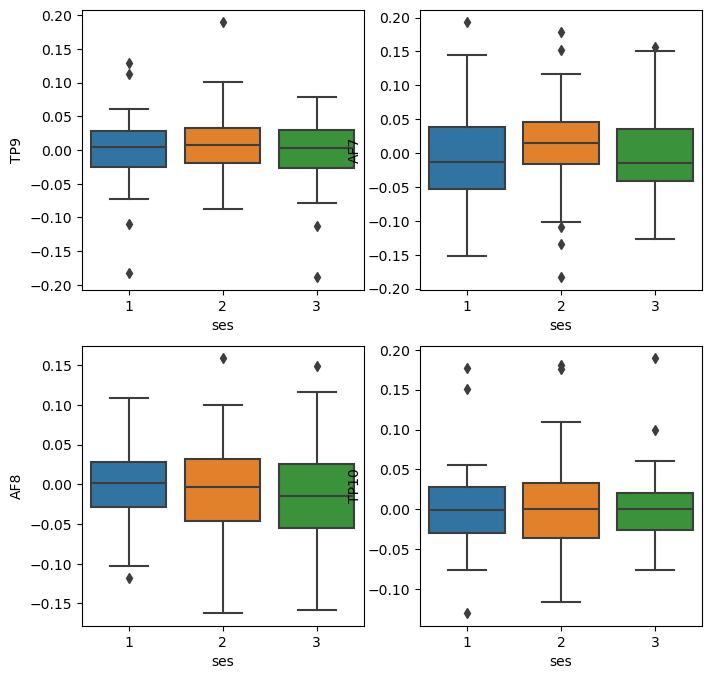

In [64]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

channels = ["TP9", "AF7", "AF8", "TP10"]
for i in range(4):
    sns.boxplot(x = corr_df[~filter_index].ses, y = corr_df[~filter_index][channels[i]], ax=axs[i//2, i%2])

In [53]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, tol=1, random_state=0).fit(corr_df[["TP10", "AF7", "AF8", "TP9"]])

labels = gmm.predict(corr_df[["TP10", "AF7", "AF8", "TP9"]])
labels.sum()

1

In [57]:
filter_index = (corr_df[["TP10", "AF7", "AF8", "TP9"]] > 0.2).any(1)  | (corr_df[["TP10", "AF7", "AF8", "TP9"]] < -0.2).any(1)

In [58]:
filter_index.sum()

25

In [62]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses,Performance,Time (sec),Signal Drop
1,0.060650,-0.051558,-0.034861,0.038447,60,1,3.0,454.0,1.0
2,-0.010182,0.093458,-0.161952,-0.012660,60,2,3.0,494.0,1.0
3,0.016426,0.036092,-0.000918,-0.066099,60,3,4.0,400.0,0.0
4,-0.037079,-0.258230,0.328920,-0.218062,62,1,8.0,329.0,1.0
5,-0.043783,-0.023168,-0.001434,-0.044677,62,3,9.0,353.0,0.0
...,...,...,...,...,...,...,...,...,...
181,0.080516,-0.053196,-0.097793,0.073627,172,2,7.0,180.0,0.0
182,-0.432046,0.399743,-0.144200,-0.186687,174,1,9.0,407.0,1.0
183,0.031208,0.015347,0.019999,-0.014736,174,2,7.0,322.0,0.0
184,-0.009230,-0.006618,-0.020977,-0.021123,174,3,9.0,244.0,0.0


In [63]:
print(pearsonr(corr_df[~filter_index].TP9, corr_df[~filter_index].Performance))
print(pearsonr(corr_df[~filter_index].AF7, corr_df[~filter_index].Performance))
print(pearsonr(corr_df[~filter_index].AF8, corr_df[~filter_index].Performance))
print(pearsonr(corr_df[~filter_index].TP10, corr_df[~filter_index].Performance))

(-0.03081674174112025, 0.7227297526918082)
(0.08864515053993326, 0.3065914656931469)
(-0.03595367702287941, 0.6788790144503526)
(-0.10202535984712502, 0.23900409467201664)


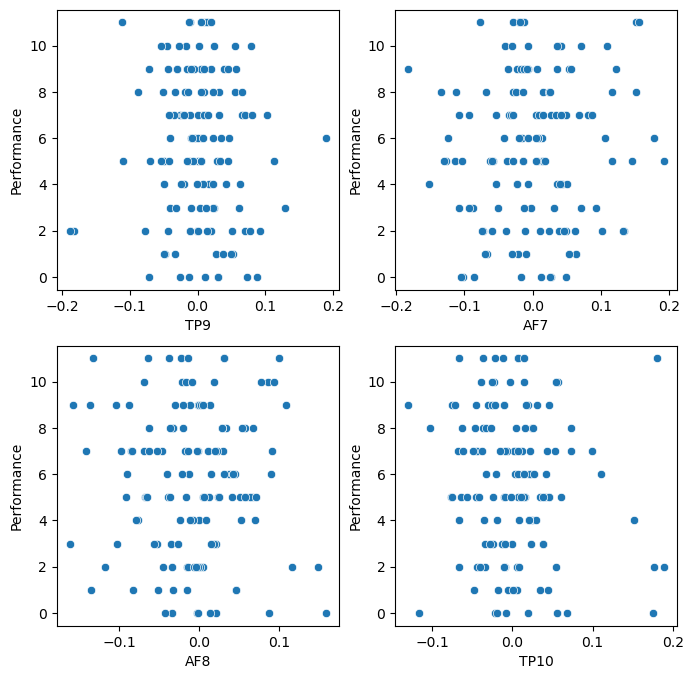

In [56]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

channels = ["TP9", "AF7", "AF8", "TP10"]
for i in range(4):
    sns.scatterplot(x = corr_df[~filter_index][channels[i]], y = corr_df[~filter_index].Performance, ax=axs[i//2, i%2])

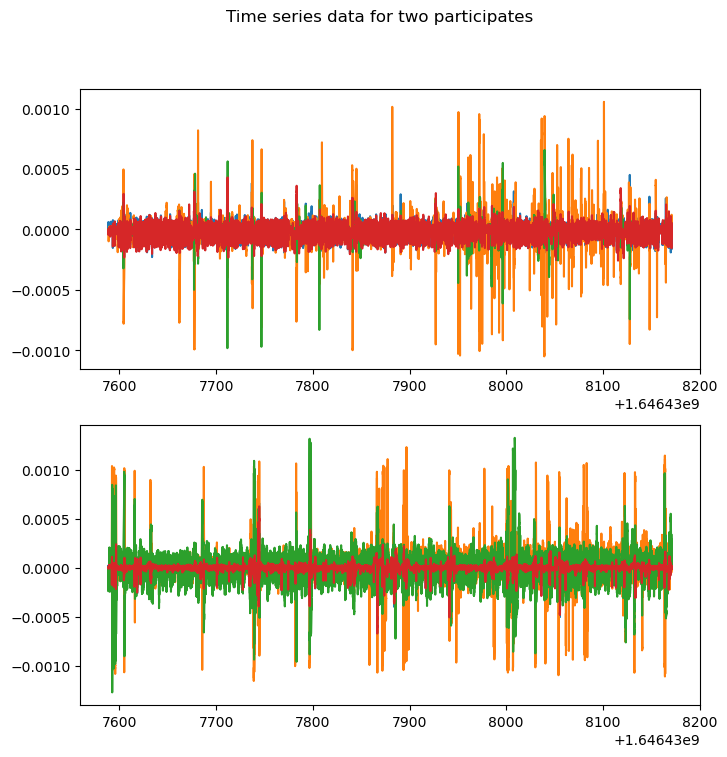

In [73]:
fig, axs = plt.subplots(2,figsize=(8,8))

fig.suptitle('Time series data for two participates')

for i in range(2):
    y = streams[i]['time_series'][10:-10,:]
    x = streams[i]['time_stamps'][10:-10]
    axs[i].plot(x, y)

plt.show()

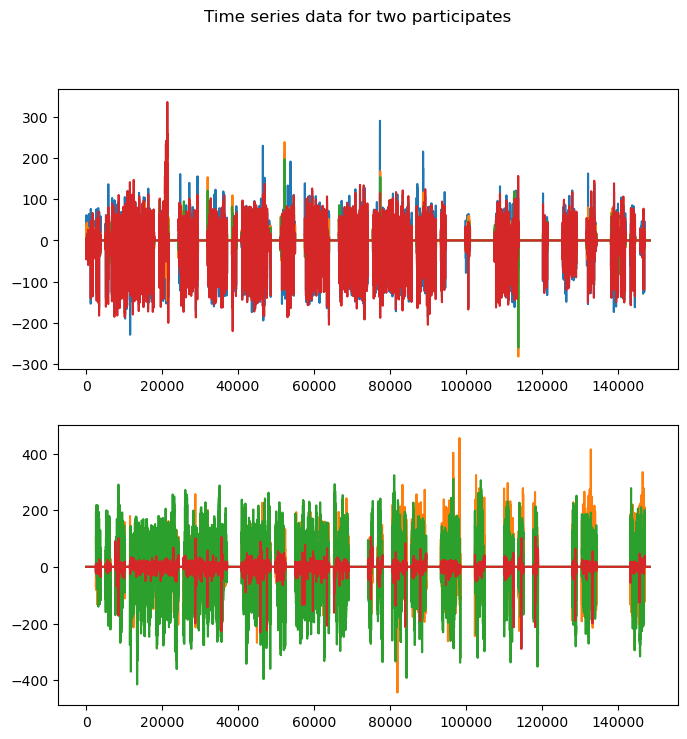

In [75]:
fig, axs = plt.subplots(2,figsize=(8,8))

fig.suptitle('Time series data for two participates')
axs[0].plot(pair_df.iloc[:,3:7])
axs[1].plot(pair_df.iloc[:,7:])

plt.show()

In [55]:
import numpy as np

In [104]:
TP9_corr = pair_df[["TP9-1", "TP9-2"]].corr().iloc[0,1]
TP10_corr = pair_df[["TP10-1", "TP10-2"]].corr().iloc[0,1]
AF7_corr = pair_df[["AF7-1", "AF7-2"]].corr().iloc[0,1]
AF8_corr = pair_df[["AF8-1", "AF8-2"]].corr().iloc[0,1]

print("the TP9 correlation is ", TP9_corr)
print("the TP10 correlation is ", TP10_corr)
print("the AF7 correlation is ", AF7_corr)
print("the AF8 correlation is ", AF8_corr)

print("the average correlation is ", 
      np.mean([TP9_corr,TP10_corr,AF7_corr,AF8_corr]))

the TP9 correlation is  -0.015766858748310072
the TP10 correlation is  0.010228036589066618
the AF7 correlation is  -0.002610921569420737
the AF8 correlation is  0.0031203126553471044
the average correlation is  -0.0012573577683292715


In [105]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=1)
U_c, V_c = cca.fit_transform(pair_df.iloc[:,3:7], pair_df.iloc[:,7:])
result = np.corrcoef(U_c.T, V_c.T)[0,1]
result

0.03522532589616848

1. got all of the data and task performance
2. 